In [133]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, recall_score,accuracy_score, precision_score, classification_report
import warnings 
warnings.filterwarnings('ignore')
import sidetable as stb
from xgboost import XGBClassifier

In [7]:
pd.set_option('max_columns',None)

In [379]:
df = pd.read_csv('phone_cleaned1.csv')

In [380]:
df.head()

# since all the data has been cleaned during the eda process we're going to focus on the machine learning process

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor,primary_camera,front_camera
0,0,842,0,2.2,0,1,0,7,0.6,188,2,2,786.934862,756,2549,19,0,0,1,1,1.0,1.0,4.49,HD Screen,2 to 3 GB,upto 2.5GHz,1.0,upto 4MP,upto 4MP
1,1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.000000,1988,2631,7,1,1,0,2,0.0,1.0,6.80,HD Screen,2 to 3 GB,upto 1GHz,1.0,upto 8MP,No Camera
2,2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.000000,1716,2603,9,1,1,0,2,1.0,1.0,4.40,HD Screen,2 to 3 GB,upto 1GHz,1.0,upto 8MP,upto 4MP
3,3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.000000,1786,2769,11,1,0,0,2,0.0,1.0,7.04,HD Screen,2 to 3 GB,upto 2.5GHz,1.0,upto 12MP,No Camera
4,4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.000000,1212,1411,15,1,1,0,1,1.0,1.0,3.25,HD Screen,1 to 2 GB,upto 1.5GHz,1.0,upto 16MP,upto 16MP


### Feature Engineering and encoding Process

#### Encoding the screen quality 

In [381]:
df['screen_quality'].unique()

array(['HD Screen', 'Not HD'], dtype=object)

In [382]:
screen = {'Not HD': 0, 'HD Screen':1}
df['screen_quality'] = df['screen_quality'].map(screen)
df.head()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor,primary_camera,front_camera
0,0,842,0,2.2,0,1,0,7,0.6,188,2,2,786.934862,756,2549,19,0,0,1,1,1.0,1.0,4.49,1,2 to 3 GB,upto 2.5GHz,1.0,upto 4MP,upto 4MP
1,1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.000000,1988,2631,7,1,1,0,2,0.0,1.0,6.80,1,2 to 3 GB,upto 1GHz,1.0,upto 8MP,No Camera
2,2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.000000,1716,2603,9,1,1,0,2,1.0,1.0,4.40,1,2 to 3 GB,upto 1GHz,1.0,upto 8MP,upto 4MP
3,3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.000000,1786,2769,11,1,0,0,2,0.0,1.0,7.04,1,2 to 3 GB,upto 2.5GHz,1.0,upto 12MP,No Camera
4,4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.000000,1212,1411,15,1,1,0,1,1.0,1.0,3.25,1,1 to 2 GB,upto 1.5GHz,1.0,upto 16MP,upto 16MP


In [383]:
df = df.drop(columns = 'Unnamed: 0')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,786.934862,756,2549,19,0,0,1,1,1.0,1.0,4.49,1,2 to 3 GB,upto 2.5GHz,1.0,upto 4MP,upto 4MP
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.000000,1988,2631,7,1,1,0,2,0.0,1.0,6.80,1,2 to 3 GB,upto 1GHz,1.0,upto 8MP,No Camera
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.000000,1716,2603,9,1,1,0,2,1.0,1.0,4.40,1,2 to 3 GB,upto 1GHz,1.0,upto 8MP,upto 4MP
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.000000,1786,2769,11,1,0,0,2,0.0,1.0,7.04,1,2 to 3 GB,upto 2.5GHz,1.0,upto 12MP,No Camera
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.000000,1212,1411,15,1,1,0,1,1.0,1.0,3.25,1,1 to 2 GB,upto 1.5GHz,1.0,upto 16MP,upto 16MP


#### Ram_size

In [384]:
df['ram_size'] = df['ram_size'].fillna('256 to 512 MB')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,786.934862,756,2549,19,0,0,1,1,1.0,1.0,4.49,1,2 to 3 GB,upto 2.5GHz,1.0,upto 4MP,upto 4MP
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.000000,1988,2631,7,1,1,0,2,0.0,1.0,6.80,1,2 to 3 GB,upto 1GHz,1.0,upto 8MP,No Camera
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.000000,1716,2603,9,1,1,0,2,1.0,1.0,4.40,1,2 to 3 GB,upto 1GHz,1.0,upto 8MP,upto 4MP
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.000000,1786,2769,11,1,0,0,2,0.0,1.0,7.04,1,2 to 3 GB,upto 2.5GHz,1.0,upto 12MP,No Camera
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.000000,1212,1411,15,1,1,0,1,1.0,1.0,3.25,1,1 to 2 GB,upto 1.5GHz,1.0,upto 16MP,upto 16MP


In [385]:
df['ram_size'].unique()

array(['2 to 3 GB', '1 to 2 GB', '3 to 4 GB', '512 MB to 1GB',
       '256 to 512 MB'], dtype=object)

In [386]:
ramsize = {'256 to 512 MB': 0, '512 MB to 1GB':1, '1 to 2 GB':2, '2 to 3 GB':3, '3 to 4 GB':4}

df['ram_size'] = df['ram_size'].map(ramsize)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,786.934862,756,2549,19,0,0,1,1,1.0,1.0,4.49,1,3,upto 2.5GHz,1.0,upto 4MP,upto 4MP
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.000000,1988,2631,7,1,1,0,2,0.0,1.0,6.80,1,3,upto 1GHz,1.0,upto 8MP,No Camera
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.000000,1716,2603,9,1,1,0,2,1.0,1.0,4.40,1,3,upto 1GHz,1.0,upto 8MP,upto 4MP
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.000000,1786,2769,11,1,0,0,2,0.0,1.0,7.04,1,3,upto 2.5GHz,1.0,upto 12MP,No Camera
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.000000,1212,1411,15,1,1,0,1,1.0,1.0,3.25,1,2,upto 1.5GHz,1.0,upto 16MP,upto 16MP


### Processor Speed

In [387]:
df['speed'].unique()

array(['upto 2.5GHz', 'upto 1GHz', 'upto 1.5GHz', 'upto 2GHz',
       'upto 3.0GHz'], dtype=object)

In [388]:
speed = {'upto 1GHz':0, 'upto 1.5GHz':1, 'upto 2GHz':2, 'upto 2.5GHz':3,'upto 3.0GHz':4 }
df['speed'] = df['speed'].map(speed)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,786.934862,756,2549,19,0,0,1,1,1.0,1.0,4.49,1,3,3,1.0,upto 4MP,upto 4MP
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.000000,1988,2631,7,1,1,0,2,0.0,1.0,6.80,1,3,0,1.0,upto 8MP,No Camera
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.000000,1716,2603,9,1,1,0,2,1.0,1.0,4.40,1,3,0,1.0,upto 8MP,upto 4MP
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.000000,1786,2769,11,1,0,0,2,0.0,1.0,7.04,1,3,3,1.0,upto 12MP,No Camera
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.000000,1212,1411,15,1,1,0,1,1.0,1.0,3.25,1,2,1,1.0,upto 16MP,upto 16MP


### Camera

In [389]:
df['primary_camera'].unique()

array(['upto 4MP', 'upto 8MP', 'upto 12MP', 'upto 16MP', 'No Camera',
       'upto 20MP'], dtype=object)

In [390]:
df['front_camera'].unique()

array(['upto 4MP', 'No Camera', 'upto 16MP', 'upto 8MP', 'upto 12MP',
       'upto 20MP'], dtype=object)

In [391]:
camera = {'No Camera':0, 'upto 4MP':1, 'upto 8MP':2, 'upto 12MP':3, 'upto 16MP':4, 'upto 20MP': 5}

df['primary_camera'] = df['primary_camera'].map(camera)
df['front_camera'] = df['front_camera'].map(camera)

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,786.934862,756,2549,19,0,0,1,1,1.0,1.0,4.49,1,3,3,1.0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.000000,1988,2631,7,1,1,0,2,0.0,1.0,6.80,1,3,0,1.0,2,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.000000,1716,2603,9,1,1,0,2,1.0,1.0,4.40,1,3,0,1.0,2,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.000000,1786,2769,11,1,0,0,2,0.0,1.0,7.04,1,3,3,1.0,3,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.000000,1212,1411,15,1,1,0,1,1.0,1.0,3.25,1,2,1,1.0,4,4


In [392]:
df.info()

# now all the data has been encoded we can move on with the process 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   battery_power        2000 non-null   int64  
 1   blue                 2000 non-null   int64  
 2   clock_speed          2000 non-null   float64
 3   dual_sim             2000 non-null   int64  
 4   fc                   2000 non-null   int64  
 5   four_g               2000 non-null   int64  
 6   int_memory           2000 non-null   int64  
 7   m_dep                2000 non-null   float64
 8   mobile_wt            2000 non-null   int64  
 9   n_cores              2000 non-null   int64  
 10  pc                   2000 non-null   int64  
 11  px_height            2000 non-null   float64
 12  px_width             2000 non-null   int64  
 13  ram                  2000 non-null   int64  
 14  talk_time            2000 non-null   int64  
 15  three_g              2000 non-null   i

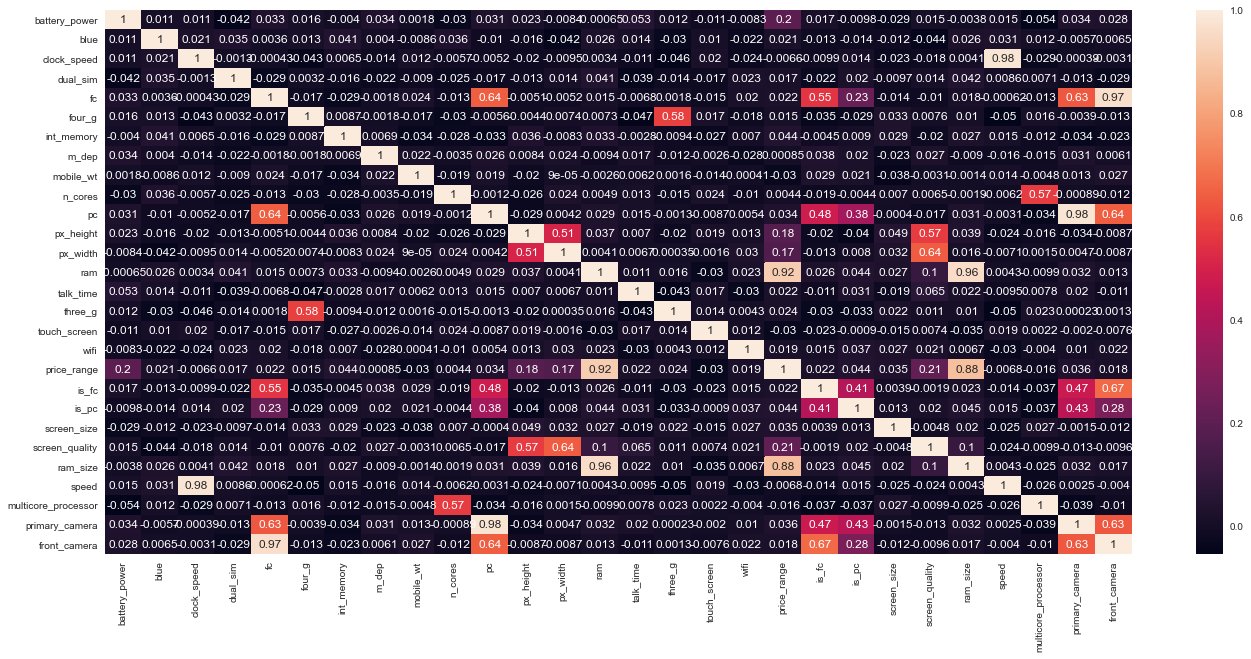

In [393]:
plt.figure(figsize = (23, 10))
sns.heatmap(df.corr(), annot = True)

In [394]:
correlation = df.corr()
correlation['price_range'].sort_values(ascending = False)[1:]

# the features that's going to get selected is 
# - ram
# - battery power
# - px_width
# - px_height
# - int_memory
# - is_pc

# we only select features that has correlation above 0.04 or below 0.04
# some features not selected due to multicolinearity 

ram                    0.917046
ram_size               0.879003
screen_quality         0.210287
battery_power          0.200723
px_height              0.183910
px_width               0.165818
int_memory             0.044435
is_pc                  0.043910
primary_camera         0.036386
screen_size            0.034804
pc                     0.033599
three_g                0.023611
is_fc                  0.022085
fc                     0.021998
talk_time              0.021859
blue                   0.020573
wifi                   0.018785
front_camera           0.017697
dual_sim               0.017444
four_g                 0.014772
n_cores                0.004399
m_dep                  0.000853
clock_speed           -0.006606
speed                 -0.006827
multicore_processor   -0.016455
mobile_wt             -0.030302
touch_screen          -0.030411
Name: price_range, dtype: float64

## Features Selection and Model Building

In [395]:
X = df[['ram', 'battery_power', 'px_height','px_width', 'int_memory', 'is_pc']]
y = df['price_range']

# - ram
# - battery power
# - px_width
# - px_height
# - int_memory
# - is_pc


**Train Test Split**

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state  = 42 , test_size = 0.2)

## Base Model

**Logistic Regression**

In [397]:
log_reg = LogisticRegression()

In [398]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [399]:
y_logreg_base = log_reg.predict(X_test)

In [400]:
## checking score of the logistic regression

logreg_base_train = log_reg.score(X_train, y_train)

print('train accuracy: ', log_reg.score(X_train, y_train))
print('test accuracy: ', log_reg.score(X_test, y_test))

train accuracy:  0.544375
test accuracy:  0.535


In [401]:
acc_base_logreg = accuracy_score(y_test, y_logreg_base)
recall_base_logreg = recall_score(y_test, y_logreg_base, average = None)
precision_base_logreg = precision_score(y_test, y_logreg_base, average = None)
f1_base_logreg = f1_score(y_test, y_logreg_base, average = None)

print(classification_report(y_test, y_logreg_base))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       100
           1       0.44      0.42      0.43       100
           2       0.32      0.21      0.25       100
           3       0.53      0.76      0.63       100

    accuracy                           0.54       400
   macro avg       0.52      0.53      0.52       400
weighted avg       0.52      0.54      0.52       400



Text(0.5, 1.0, 'Confusion Matrix Logistic Regression Testing')

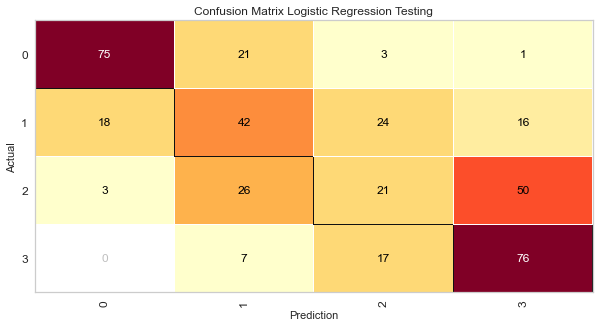

In [402]:
from yellowbrick.classifier import ConfusionMatrix

plt.figure(figsize = (10, 5))

cm_base_logreg = ConfusionMatrix(log_reg, classes = [0,1,2,3])
cm_base_logreg.fit(X_train, y_train)

cm_base_logreg.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression Testing')

In [403]:
cm_logreg_base = confusion_matrix(y_test, y_logreg_base, labels = [0,1,2,3])



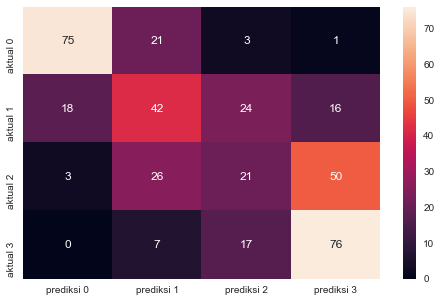

In [404]:
df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])
plt.figure(figsize = (8, 5))
sns.heatmap(df_logreg_base, annot = True)

### KNeighbors Classsifier

In [405]:
KNN_base = KNeighborsClassifier()
KNN_base.fit(X_train, y_train)
y_KNN_base = KNN_base.predict(X_test)

In [406]:
# training and testing score 
KNN_base_train = KNN_base.score(X_train, y_train)

print('train accuracy KNN base: ', KNN_base.score(X_train, y_train))
print('test accuracy KNN base: ', KNN_base.score(X_test, y_test))

train accuracy KNN base:  0.938125
test accuracy KNN base:  0.925


In [407]:
acc_base_KNN = accuracy_score(y_test, y_KNN_base)
recall_base_KNN = recall_score(y_test, y_KNN_base, average = None)
precision_base_KNN = precision_score(y_test, y_KNN_base, average = None)
f1_base_KNN = f1_score(y_test, y_KNN_base, average = None)

print(classification_report(y_test, y_KNN_base))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       0.91      0.91      0.91       100
           2       0.88      0.87      0.87       100
           3       0.95      0.93      0.94       100

    accuracy                           0.93       400
   macro avg       0.92      0.93      0.92       400
weighted avg       0.92      0.93      0.92       400



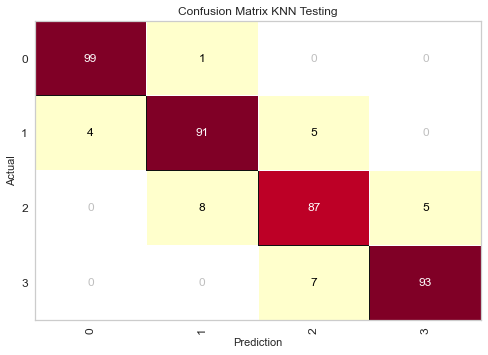

In [408]:
cm_base_KNN = ConfusionMatrix(KNN_base, classes = [0,1,2,3])
cm_base_KNN.fit(X_train, y_train)

cm_base_KNN.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN Testing')
plt.show()

### SVC

In [409]:
SVC_base = SVC()
SVC_base.fit(X_train, y_train)
y_SVC_base = SVC_base.predict(X_test)

In [410]:
SVC_base_train = SVC_base.score(X_train, y_train)

print('train accuracy SVC base: ', SVC_base.score(X_train, y_train))
print('test accuracy SVC base: ', SVC_base.score(X_test, y_test))

train accuracy SVC base:  0.9275
test accuracy SVC base:  0.94


In [411]:
acc_base_SVC = accuracy_score(y_test, y_SVC_base)
recall_base_SVC = recall_score(y_test, y_SVC_base, average = None)
precision_base_SVC = precision_score(y_test, y_SVC_base, average = None)
f1_base_SVC = f1_score(y_test, y_SVC_base, average = None)

print(classification_report(y_test, y_SVC_base))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       100
           1       0.91      0.94      0.93       100
           2       0.94      0.87      0.90       100
           3       0.94      0.97      0.96       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



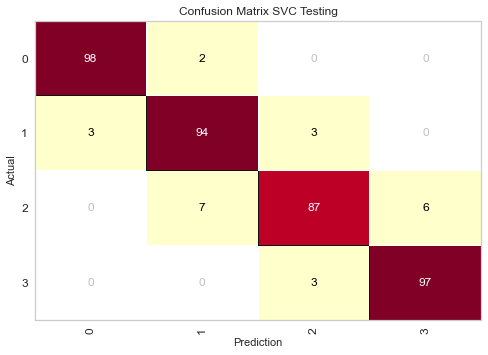

In [412]:
cm_base_SVC = ConfusionMatrix(SVC_base, classes = [0,1,2,3])
cm_base_SVC.fit(X_train, y_train)

cm_base_SVC.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC Testing')
plt.show()

### Decision Tree

In [413]:
DT_base = DecisionTreeClassifier()
DT_base.fit(X_train, y_train)
y_DT_base = DT_base.predict(X_test)

In [414]:
DT_base_train = DT_base.score(X_train, y_train)

print('train accuracy Decision Tree base: ', DT_base.score(X_train, y_train))
print('test accuracy Decision Tree base: ', DT_base.score(X_test, y_test))

# we can clearly see that this model is overfitting looking at the difference from the training and test

train accuracy Decision Tree base:  1.0
test accuracy Decision Tree base:  0.8675


In [415]:
acc_base_DT = accuracy_score(y_test, y_DT_base)
recall_base_DT = recall_score(y_test, y_DT_base, average = None)
precision_base_DT = precision_score(y_test, y_DT_base, average = None)
f1_base_DT = f1_score(y_test, y_DT_base, average = None)

print(classification_report(y_test, y_DT_base))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       100
           1       0.83      0.80      0.82       100
           2       0.79      0.83      0.81       100
           3       0.93      0.90      0.91       100

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



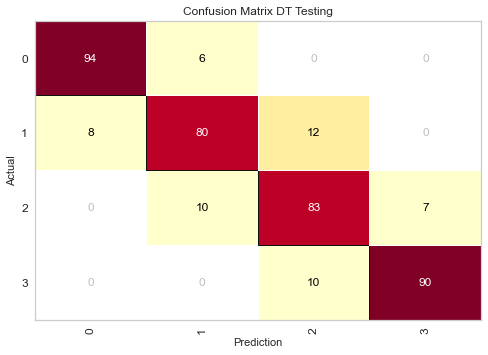

In [416]:
cm_base_DT = ConfusionMatrix(DT_base, classes = [0,1,2,3])
cm_base_DT.fit(X_train, y_train)

cm_base_DT.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT Testing')
plt.show()

### Random Forest

In [417]:
RF_base = RandomForestClassifier()
RF_base.fit(X_train, y_train)
y_RF_base = RF_base.predict(X_test)



In [418]:
RF_base_train = RF_base.score(X_train, y_train)

print('train accuracy Random Forest base: ', RF_base.score(X_train, y_train))
print('test accuracy Random Forest base: ', RF_base.score(X_test, y_test))

# we can see that this algorithm has an overfitting problem as well

train accuracy Random Forest base:  1.0
test accuracy Random Forest base:  0.945


In [419]:
acc_base_RF = accuracy_score(y_test, y_RF_base)
recall_base_RF = recall_score(y_test, y_RF_base, average = None)
precision_base_RF = precision_score(y_test, y_RF_base, average = None)
f1_base_RF = f1_score(y_test, y_RF_base, average = None)

print(classification_report(y_test, y_RF_base))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       100
           1       0.97      0.89      0.93       100
           2       0.88      0.95      0.91       100
           3       0.98      0.94      0.96       100

    accuracy                           0.94       400
   macro avg       0.95      0.94      0.95       400
weighted avg       0.95      0.94      0.95       400



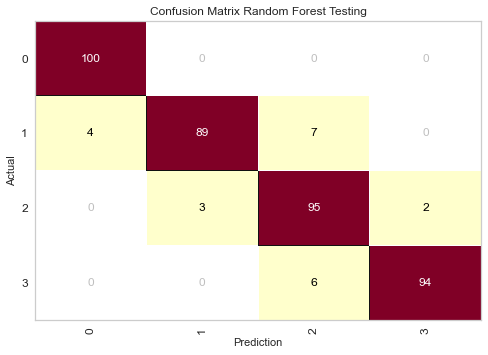

In [420]:
cm_base_RF = ConfusionMatrix(RF_base, classes = [0,1,2,3])
cm_base_RF.fit(X_train, y_train)

cm_base_RF.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest Testing')
plt.show()

### XGB

In [421]:
XGB_base = XGBClassifier()
XGB_base.fit(X_train, y_train)
y_XGB_base = XGB_base.predict(X_test)

In [422]:
XGB_base_train = XGB_base.score(X_train, y_train)

print('train accuracy XGB base: ', XGB_base.score(X_train, y_train))
print('test accuracy XGB base: ', XGB_base.score(X_test, y_test))

train accuracy XGB base:  1.0
test accuracy XGB base:  0.9525


In [423]:
acc_base_XGB = accuracy_score(y_test, y_XGB_base)
recall_base_XGB = recall_score(y_test, y_XGB_base, average = None)
precision_base_XGB = precision_score(y_test, y_XGB_base, average = None)
f1_base_XGB = f1_score(y_test, y_XGB_base, average = None)

print(classification_report(y_test, y_XGB_base))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       100
           1       0.96      0.93      0.94       100
           2       0.92      0.93      0.93       100
           3       0.97      0.95      0.96       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



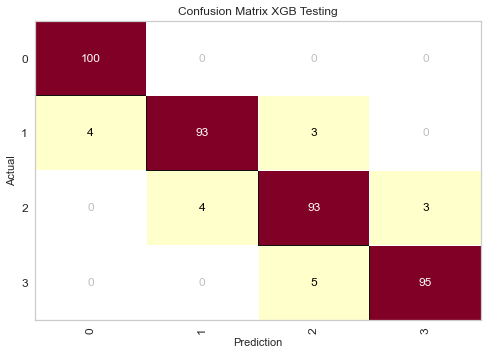

In [424]:
cm_base_XGB = ConfusionMatrix(XGB_base, classes = [0,1,2,3])
cm_base_XGB.fit(X_train, y_train)

cm_base_XGB.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGB Testing')
plt.show()

## Evaluation Matrix

In [425]:
cm_logreg_base = confusion_matrix(y_test, y_logreg_base, labels = [0,1,2,3])
cm_KNN_base = confusion_matrix(y_test, y_KNN_base, labels = [0,1,2,3])
cm_SVC_base = confusion_matrix(y_test, y_SVC_base, labels = [0,1,2,3])
cm_DT_base = confusion_matrix(y_test, y_DT_base, labels = [0,1,2,3])
cm_RF_base = confusion_matrix(y_test, y_RF_base, labels = [0,1,2,3])
cm_XGB_base = confusion_matrix(y_test, y_XGB_base, labels = [0,1,2,3])




df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])
df_KNN_base = pd.DataFrame(data = cm_KNN_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])
df_SVC_base = pd.DataFrame(data = cm_SVC_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])
df_DT_base = pd.DataFrame(data = cm_DT_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])
df_RF_base = pd.DataFrame(data = cm_RF_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])
df_XGB_base = pd.DataFrame(data = cm_XGB_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])



In [426]:
evaluation_matrix_base = {'Training': [logreg_base_train, KNN_base_train,SVC_base_train,DT_base_train, RF_base_train,XGB_base_train],
                         'Testing':[acc_base_logreg, acc_base_KNN,acc_base_SVC,acc_base_DT,acc_base_RF,acc_base_XGB]}

eva_base = pd.DataFrame(data = evaluation_matrix_base, index = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'Xtreme Gradient Boost'])
eva_base

# we can see from here that SVC has the best base model among all algortihm
# and from the base model there are 3 overfitting case in Decision Tree, Random Forest, and XGB
# among all the base model algorithm logistic regression has the worst performance 
# predicting the base model 

,Training,Testing
Logistic Regression,0.544375,0.5350
KNN,0.938125,0.9250
SVC,0.927500,0.9400
Decision Tree,1.000000,0.8675
Random Forest,1.000000,0.9450
Xtreme Gradient Boost,1.000000,0.9525


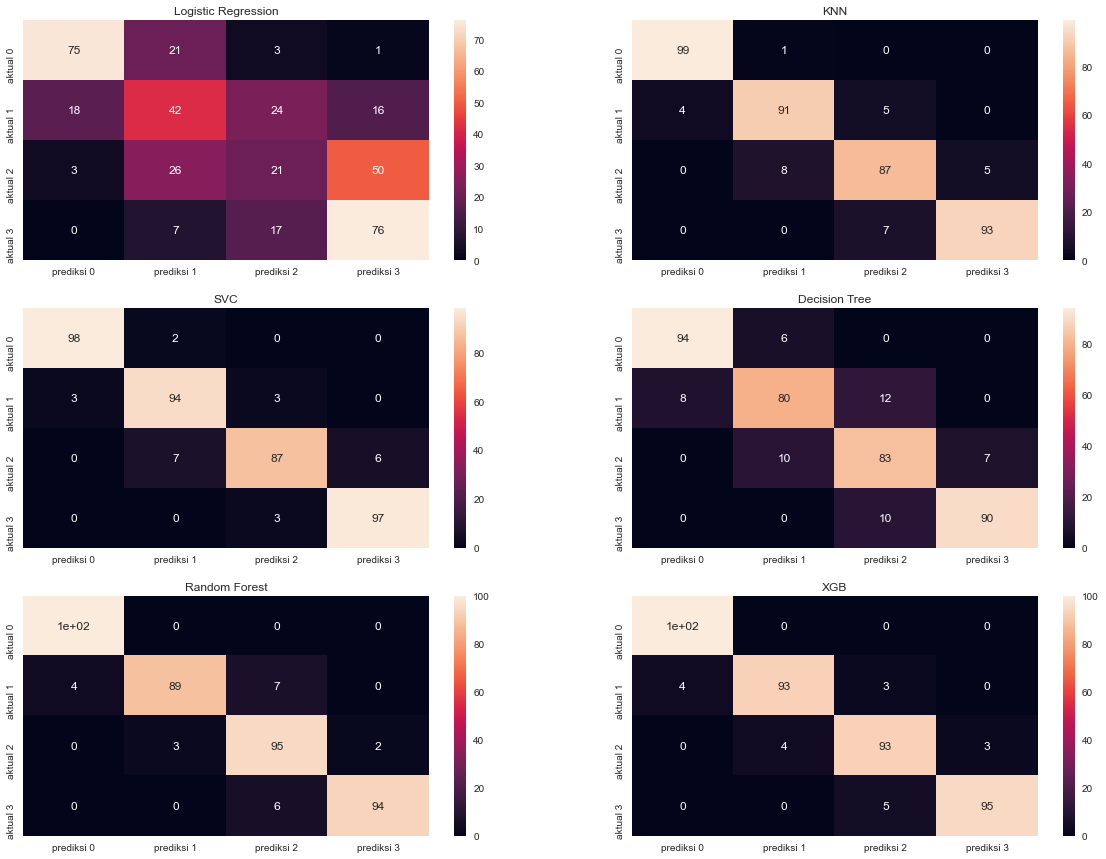

In [427]:
plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sns.heatmap(df_logreg_base, annot = True)
plt.title('Logistic Regression')


plt.subplot(3,2,2)
sns.heatmap(df_KNN_base, annot = True)
plt.title('KNN')

plt.subplot(3,2,3)
sns.heatmap(df_SVC_base, annot = True)
plt.title('SVC')

plt.subplot(3,2,4)
sns.heatmap(df_DT_base, annot = True)
plt.title('Decision Tree')

plt.subplot(3,2,5)
sns.heatmap(df_RF_base, annot = True)
plt.title('Random Forest')


plt.subplot(3,2,6)
sns.heatmap(df_XGB_base, annot = True)
plt.title('XGB')

plt.show()

## Scaling

In [428]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [454]:
#scalling
minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled = minmax_scaler.fit_transform(X_test)

# since there's a little amount of outliers we're going to use minmax scaler
# we scaled the train and the test value 

In [455]:
logreg_scaled = LogisticRegression()
logreg_scaled.fit(X_train_scaled, y_train)
y_logreg_scaled = logreg_scaled.predict(X_test_scaled)

In [456]:
logreg_scaled_train = logreg_scaled.score(X_train_scaled, y_train)
print('train accuracy Logistic Regression Scaled: ', logreg_scaled.score(X_train_scaled, y_train))
print('test accuracy Logistic Regression Scaled: ', logreg_scaled.score(X_test_scaled, y_test))

# wow looking at this logistic regression evaluation matrix jump up about 0.4 from base to scaled model


train accuracy Logistic Regression Scaled:  0.909375
test accuracy Logistic Regression Scaled:  0.935


In [457]:
acc_scaled_logreg = accuracy_score(y_test, y_logreg_scaled)
recall_scaled_logreg = recall_score(y_test, y_logreg_scaled, average = None)
precision_scaled_logreg = precision_score(y_test, y_logreg_scaled, average = None)
f1_scaled_logreg = f1_score(y_test, y_logreg_scaled, average = None)

print(classification_report(y_test, y_logreg_scaled))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       100
           1       0.93      0.91      0.92       100
           2       0.93      0.88      0.90       100
           3       0.94      0.96      0.95       100

    accuracy                           0.94       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.94      0.93       400



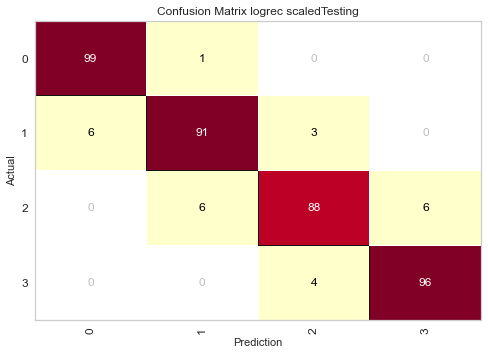

In [458]:
cm_scaled_logreg = ConfusionMatrix(logreg_scaled, classes = [0,1,2,3])
cm_scaled_logreg.fit(X_train_scaled, y_train)

cm_scaled_logreg.score(X_test_scaled, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix logrec scaledTesting')
plt.show()

### KNN Scaled

In [459]:
KNN_scaled = KNeighborsClassifier()
KNN_scaled.fit(X_train_scaled, y_train)
y_KNN_scaled = KNN_scaled.predict(X_test_scaled)

In [460]:
KNN_scaled_train = KNN_scaled.score(X_train_scaled, y_train)
print('train accuracy KNN Scaled: ', KNN_scaled.score(X_train_scaled, y_train))
print('test accuracy KNN Scaled: ', KNN_scaled.score(X_test_scaled, y_test))

# after the scaling KNN accuracy become lower and it become overfit

train accuracy KNN Scaled:  0.891875
test accuracy KNN Scaled:  0.8475


In [468]:
acc_scaled_KNN = accuracy_score(y_test, y_KNN_scaled)
recall_scaled_KNN = recall_score(y_test, y_KNN_scaled, average = None)
precision_scaled_KNN = precision_score(y_test, y_KNN_scaled, average = None)
f1_scaled_KNN = f1_score(y_test, y_KNN_scaled, average = None)

print(classification_report(y_test, y_KNN_scaled))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       100
           1       0.76      0.79      0.77       100
           2       0.76      0.77      0.77       100
           3       0.95      0.90      0.92       100

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



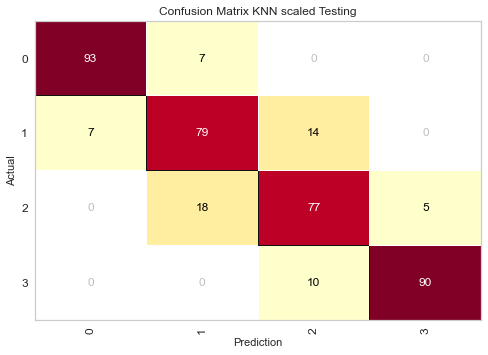

In [463]:
cm_scaled_KNN = ConfusionMatrix(KNN_scaled, classes = [0,1,2,3])
cm_scaled_KNN.fit(X_train_scaled, y_train)

cm_scaled_KNN.score(X_test_scaled, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN scaled Testing')
plt.show()

### SVC Scaled

In [465]:
SVC_scaled = SVC()
SVC_scaled.fit(X_train_scaled, y_train)
y_SVC_scaled = SVC_scaled.predict(X_test_scaled)

In [466]:
SVC_scaled_train = SVC_scaled.score(X_train_scaled, y_train)
print('train accuracy SVC Scaled: ', SVC_scaled.score(X_train_scaled, y_train))
print('test accuracy SVC Scaled: ', SVC_scaled.score(X_test_scaled, y_test))

# svc evaluation matrix goes sligthly lower after scalling 

train accuracy KNN Scaled:  0.93125
test accuracy KNN Scaled:  0.9275


In [467]:
acc_scaled_SVC = accuracy_score(y_test, y_SVC_scaled)
recall_scaled_SVC = recall_score(y_test, y_SVC_scaled, average = None)
precision_scaled_SVC = precision_score(y_test, y_SVC_scaled, average = None)
f1_scaled_SVC = f1_score(y_test, y_SVC_scaled, average = None)

print(classification_report(y_test, y_SVC_scaled))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       100
           1       0.89      0.93      0.91       100
           2       0.91      0.88      0.89       100
           3       0.95      0.94      0.94       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



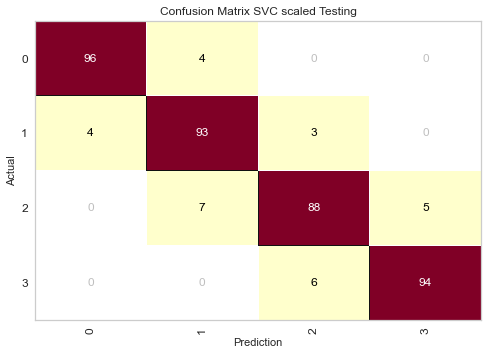

In [469]:
cm_scaled_SVC = ConfusionMatrix(SVC_scaled, classes = [0,1,2,3])
cm_scaled_SVC.fit(X_train_scaled, y_train)

cm_scaled_SVC.score(X_test_scaled, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC scaled Testing')
plt.show()

# note we don't scale tree based algorithm since it doesn't required to be scaled

In [492]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
logreg_poly = LogisticRegression()
logreg_poly.fit(X_train_poly, y_train)
y_logreg_poly = logreg_poly.predict(X_test_poly)

In [498]:
logreg_poly_train = logreg_poly.score(X_train_poly, y_train)
print('train accuracy logreg poly Scaled: ', logreg_poly.score(X_train_poly, y_train))
print('test accuracy logreg poly Scaled: ', logreg_poly.score(X_test_poly, y_test))

# there's a slight increase in test accuracy score of logistic regression after polynomial  degree 2

train accuracy logreg poly Scaled:  0.9275
test accuracy logreg poly Scaled:  0.95


In [494]:
acc_poly_logreg = accuracy_score(y_test, y_logreg_poly)
recall_poly_logreg = recall_score(y_test, y_logreg_poly, average = None)
precision_poly_logreg = precision_score(y_test, y_logreg_poly, average = None)
f1_poly_logreg = f1_score(y_test, y_logreg_poly, average = None)

print(classification_report(y_test, y_logreg_poly))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       100
           1       0.95      0.94      0.94       100
           2       0.92      0.92      0.92       100
           3       0.96      0.95      0.95       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



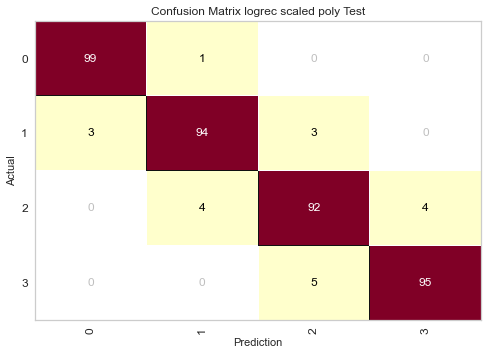

In [496]:
cm_poly_logreg = ConfusionMatrix(logreg_poly, classes = [0,1,2,3])
cm_poly_logreg.fit(X_train_poly, y_train)

cm_poly_logreg.score(X_test_poly, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix logrec scaled poly Test')
plt.show()

In [501]:


evaluation_matrix_featured = {'Training': [logreg_scaled_train, KNN_scaled_train,SVC_scaled_train,logreg_poly_train],
                         'Testing':[acc_scaled_logreg, acc_scaled_KNN,acc_scaled_SVC,acc_poly_logreg]}

eva_featured = pd.DataFrame(data = evaluation_matrix_featured, index = ['Logistic Regression Scaled', 'KNN Scaled', 'SVC Scaled', 'Linreg Scaled Poly'])
eva_featured


,Training,Testing
Logistic Regression Scaled,0.909375,0.9350
KNN Scaled,0.891875,0.8475
SVC Scaled,0.931250,0.9275
Linreg Scaled Poly,0.927500,0.9500


# HEATMAP PICTURE

### HyperParameter Tuning


#### Logistic Regression

In [503]:
logreg_tuning = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

model_logreg_tuned = GridSearchCV(estimator = logreg_tuning, param_grid = param_logreg, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
model_logreg_tuned.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    2.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [505]:
logreg_tuned = model_logreg_tuned.best_estimator_
y_tuned_logreg = logreg_tuned.predict(X_test_scaled)

In [519]:
logreg_tuned_train = logreg_tuned.score(X_train_scaled, y_train)
print('train accuracy logreg tuned Scaled: ', logreg_tuned.score(X_train_scaled, y_train))
print('test accuracy logreg tuned Scaled: ', logreg_tuned.score(X_test_scaled, y_test))

train accuracy logreg tuned Scaled:  0.929375
test accuracy logreg tuned Scaled:  0.9475


In [509]:
acc_tuned_logreg = accuracy_score(y_test, y_tuned_logreg)

print(classification_report(y_test, y_tuned_logreg))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.93      0.95      0.94       100
           2       0.93      0.89      0.91       100
           3       0.94      0.97      0.96       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



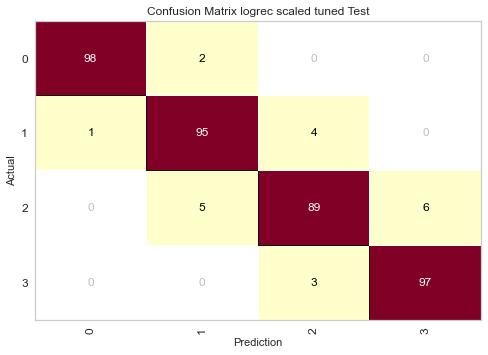

In [511]:
cm_tuned_logreg = ConfusionMatrix(logreg_tuned, classes = [0,1,2,3])
cm_tuned_logreg.fit(X_train_scaled, y_train)

cm_tuned_logreg.score(X_test_scaled, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix logrec scaled tuned Test')
plt.show()

### Polynom Logreg Tuning


In [513]:
logreg_tuning_poly = LogisticRegression()
param_logreg_poly = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

model_logreg_tuned_poly = GridSearchCV(estimator = logreg_tuning_poly, param_grid = param_logreg_poly, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
model_logreg_tuned_poly.fit(X_train_poly, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [514]:
logreg_tuned_poly = model_logreg_tuned_poly.best_estimator_
y_tuned_logreg_poly = logreg_tuned_poly.predict(X_test_poly)

In [520]:
logreg_tuned_train_poly = logreg_tuned_poly.score(X_train_poly, y_train)
print('train accuracy logreg tuned Scaled: ', logreg_tuned_poly.score(X_train_poly, y_train))
print('test accuracy logreg tuned Scaled: ', logreg_tuned_poly.score(X_test_poly, y_test))

train accuracy logreg tuned Scaled:  0.934375
test accuracy logreg tuned Scaled:  0.9475


In [521]:
acc_logreg_tuned_poly = accuracy_score(y_test, y_tuned_logreg_poly)

print(classification_report(y_test, y_tuned_logreg_poly))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.92      0.95      0.94       100
           2       0.92      0.90      0.91       100
           3       0.96      0.96      0.96       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



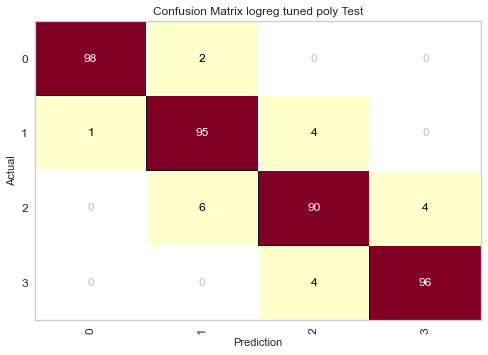

In [523]:
cm_tuned_logreg_poly = ConfusionMatrix(logreg_tuned_poly, classes = [0,1,2,3])
cm_tuned_logreg_poly.fit(X_train_poly, y_train)

cm_tuned_logreg_poly.score(X_test_poly, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix logreg tuned poly Test')
plt.show()

In [590]:
logreg_tuning_base = LogisticRegression()
param_logreg_base = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

model_logreg_tuned_base = GridSearchCV(estimator = logreg_tuning_base, param_grid = param_logreg_base, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
model_logreg_tuned_base.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    3.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [591]:
logreg_tuned_base = model_logreg_tuned_base.best_estimator_
y_tuned_logreg_base = logreg_tuned_base.predict(X_test)

In [592]:
logreg_tuned_train_base = logreg_tuned_base.score(X_train, y_train)
print('train accuracy logreg tuned Scaled: ', logreg_tuned_base.score(X_train, y_train))
print('test accuracy logreg tuned Scaled: ', logreg_tuned_base.score(X_test, y_test))

train accuracy logreg tuned Scaled:  0.544375
test accuracy logreg tuned Scaled:  0.535


In [593]:
acc_logreg_tuned_base = accuracy_score(y_test, y_tuned_logreg_base)

print(classification_report(y_test, y_tuned_logreg_base))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       100
           1       0.44      0.42      0.43       100
           2       0.32      0.21      0.25       100
           3       0.53      0.76      0.63       100

    accuracy                           0.54       400
   macro avg       0.52      0.53      0.52       400
weighted avg       0.52      0.54      0.52       400



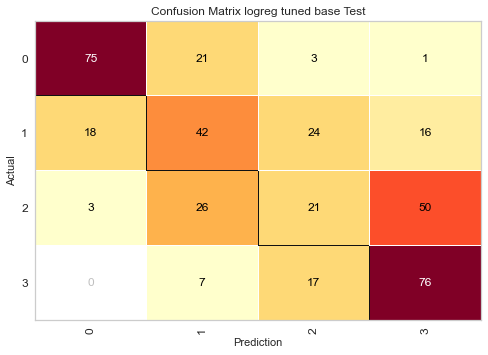

In [595]:
cm_tuned_logreg_base = ConfusionMatrix(logreg_tuned_base, classes = [0,1,2,3])
cm_tuned_logreg_base.fit(X_train, y_train)

cm_tuned_logreg_base.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix logreg tuned base Test')
plt.show()

### KNN Tuning


In [533]:
KNN_tuning = KNeighborsClassifier()
param_KNN = {'n_neighbors':[5,7,9,15, 30, 45,55 ],
               'weights':['uniform','distance'],
               'p':[2, 1],
            'algorithm': ['auto','ball_tree','kd_tree','brute'],
            'leaf_size':[30, 40, 50]}

model_KNN_tuned = GridSearchCV(estimator = KNN_tuning, param_grid = param_KNN, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
model_KNN_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1665 out of 1680 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:    6.6s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50],
                         'n_neighbors': [5, 7, 9, 15, 30, 45, 55], 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [534]:
KNN_tuned = model_KNN_tuned.best_estimator_
y_tuned_KNN = KNN_tuned.predict(X_test)

In [535]:
KNN_tuned_train = KNN_tuned.score(X_train, y_train)
print('train accuracy KNN tuned : ', KNN_tuned.score(X_train, y_train))
print('test accuracy KNN tuned : ', KNN_tuned.score(X_test, y_test))

# there is an increase in the test score of non scaled KNN however we see that there is overfitting problem

train accuracy KNN tuned :  1.0
test accuracy KNN tuned :  0.9325


In [536]:
acc_KNN_tuned = accuracy_score(y_test, y_tuned_KNN)

print(classification_report(y_test, y_tuned_KNN))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       0.91      0.90      0.90       100
           2       0.88      0.90      0.89       100
           3       0.98      0.94      0.96       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



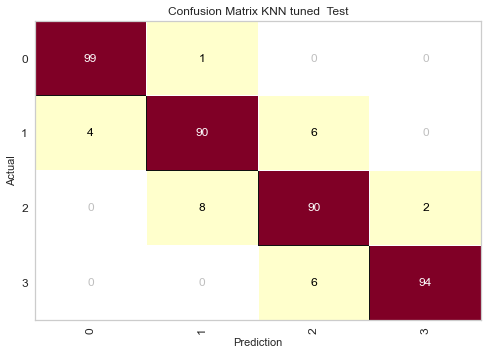

In [537]:
cm_tuned_KNN = ConfusionMatrix(KNN_tuned, classes = [0,1,2,3])
cm_tuned_KNN.fit(X_train, y_train)

cm_tuned_KNN.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN tuned  Test')
plt.show()

### KNN Scaled Tuning

In [540]:
KNN_tuning_scaled = KNeighborsClassifier()
param_KNN_scaled = {'n_neighbors':[5,7,9,15, 30, 45,55 ],
               'weights':['uniform','distance'],
               'p':[2, 1],
            'algorithm': ['auto','ball_tree','kd_tree','brute'],
            'leaf_size':[30, 40, 50]}

model_KNN_tuned_scaled = GridSearchCV(estimator = KNN_tuning_scaled, param_grid = param_KNN_scaled, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
model_KNN_tuned_scaled.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1665 out of 1680 | elapsed:    9.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:    9.2s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50],
                         'n_neighbors': [5, 7, 9, 15, 30, 45, 55], 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [546]:
KNN_tuned_scaled = model_KNN_tuned_scaled.best_estimator_
y_tuned_KNN_scaled = KNN_tuned_scaled.predict(X_test_scaled)

In [547]:
KNN_tuned_train_scaled = KNN_tuned_scaled.score(X_train_scaled, y_train)
print('train accuracy KNN scaled tuned : ', KNN_tuned_scaled.score(X_train_scaled, y_train))
print('test accuracy KNN scaled tuned : ', KNN_tuned_scaled.score(X_test_scaled, y_test))

# we can see that even after scaling we still have overfitting for the KNN 
# and the tuning with no scaling still have a better accuracy score compareed to the scaled version

train accuracy KNN scaled tuned :  1.0
test accuracy KNN scaled tuned :  0.915


In [548]:
acc_KNN_tuned_scaled = accuracy_score(y_test, y_tuned_KNN_scaled)

print(classification_report(y_test, y_tuned_KNN_scaled))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       0.90      0.87      0.88       100
           2       0.83      0.86      0.85       100
           3       0.96      0.93      0.94       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.91       400
weighted avg       0.92      0.92      0.91       400



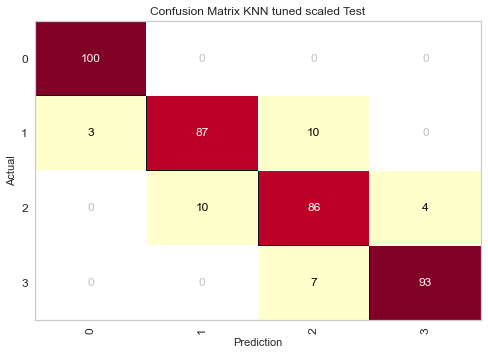

In [549]:
cm_tuned_KNN_scaled = ConfusionMatrix(KNN_tuned_scaled, classes = [0,1,2,3])
cm_tuned_KNN_scaled.fit(X_train_scaled, y_train)

cm_tuned_KNN_scaled.score(X_test_scaled, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN tuned scaled Test')
plt.show()

## SVC Tuning

In [552]:
SVC_tuned = SVC()
param_SVC_tuned = {'C':[1.0, 2.0, 3.0, 1.5],
               'kernel':['rbf','poly','sigmoid','linear'],
               'degree':[3, 2, 4, 5],
               'gamma':['scale','auto'],
               'coef0':[0.0,0.2,0.5,1.0],
               'class_weight':[None,'balanced'],
               'decision_function_shape':['ovr','ovo']}

model_SVC_tuned = RandomizedSearchCV(estimator = SVC_tuned, param_distributions= param_SVC_tuned, scoring = 'accuracy', n_jobs = -1, cv = 5, verbose = 1)
model_SVC_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   34.9s finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1.0, 2.0, 3.0, 1.5],
                                        'class_weight': [None, 'balanced'],
                                        'coef0': [0.0, 0.2, 0.5, 1.0],
                                        'decision_function_shape': ['ovr',
                                                                    'ovo'],
                                        'degree': [3, 2, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'poly', 'sigmoid',
                                                   'linear']},
                   scoring='accuracy', verbose=1)

In [553]:
SVC_tuned = model_SVC_tuned.best_estimator_
y_SVC_tuned = SVC_tuned.predict(X_test)

In [555]:
SVC_tuned_train = SVC_tuned.score(X_train, y_train)

print('train accuracy SVC tuned : ', SVC_tuned.score(X_train, y_train))
print('test accuracy SVC tuned : ', SVC_tuned.score(X_test, y_test))

# the result of tuned SVC has a slightly better score compared to the base model of SVC


train accuracy SVC tuned :  0.926875
test accuracy SVC tuned :  0.9575


In [557]:
acc_tuned_SVC = accuracy_score(y_test, y_SVC_tuned)

print(classification_report(y_test, y_SVC_tuned))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.93      0.96      0.95       100
           2       0.95      0.91      0.93       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



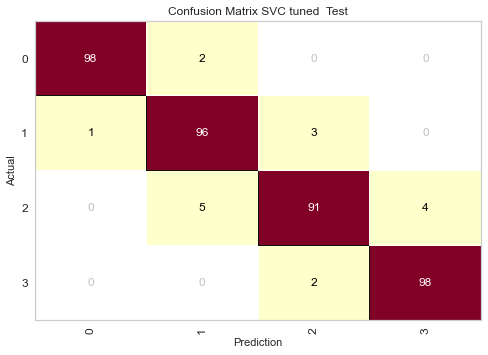

In [558]:
cm_tuned_SVC = ConfusionMatrix(SVC_tuned, classes = [0,1,2,3])
cm_tuned_SVC.fit(X_train, y_train)

cm_tuned_SVC.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC tuned  Test')
plt.show()

**Tuning Scaled SVC**

In [559]:
SVC_tuned_scaled = SVC()
param_SVC_tuned_scaled = {'C':[1.0, 2.0, 3.0, 1.5],
               'kernel':['rbf','poly','sigmoid','linear'],
               'degree':[3, 2, 4, 5],
               'gamma':['scale','auto'],
               'coef0':[0.0,0.2,0.5,1.0],
               'class_weight':[None,'balanced'],
               'decision_function_shape':['ovr','ovo']}

model_SVC_tuned_scaled = RandomizedSearchCV(estimator = SVC_tuned, param_distributions= param_SVC_tuned, scoring = 'accuracy', n_jobs = -1, cv = 5, verbose = 1)
model_SVC_tuned_scaled.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.3s finished


RandomizedSearchCV(cv=5,
                   estimator=SVC(C=1.5, class_weight='balanced', coef0=0.2,
                                 degree=2, kernel='poly'),
                   n_jobs=-1,
                   param_distributions={'C': [1.0, 2.0, 3.0, 1.5],
                                        'class_weight': [None, 'balanced'],
                                        'coef0': [0.0, 0.2, 0.5, 1.0],
                                        'decision_function_shape': ['ovr',
                                                                    'ovo'],
                                        'degree': [3, 2, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'poly', 'sigmoid',
                                                   'linear']},
                   scoring='accuracy', verbose=1)

In [560]:
SVC_tuned_scaled = model_SVC_tuned_scaled.best_estimator_
y_SVC_tuned_scaled = SVC_tuned_scaled.predict(X_test_scaled)

In [562]:
SVC_tuned_train_scaled = SVC_tuned_scaled.score(X_train_scaled, y_train)

print('train accuracy SVC tuned scaled : ', SVC_tuned_scaled.score(X_train_scaled, y_train))
print('test accuracy SVC tuned scaled: ', SVC_tuned_scaled.score(X_test_scaled, y_test))


# the scaled svc has a better score compared to the regular scaled svc and it has a better score
# than scaled svc however the tuned non scaled svc have a better tuning score compared to the scaled
# one

train accuracy SVC tuned scaled :  0.925625
test accuracy SVC tuned scaled:  0.945


In [563]:
acc_tuned_SVC_scaled = accuracy_score(y_test, y_SVC_tuned_scaled)

print(classification_report(y_test, y_SVC_tuned_scaled))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.92      0.94      0.93       100
           2       0.94      0.88      0.91       100
           3       0.94      0.98      0.96       100

    accuracy                           0.94       400
   macro avg       0.95      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



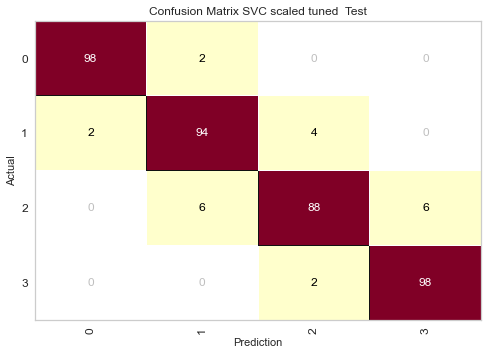

In [564]:
cm_tuned_SVC_scaled = ConfusionMatrix(SVC_tuned_scaled, classes = [0,1,2,3])
cm_tuned_SVC_scaled.fit(X_train_scaled, y_train)

cm_tuned_SVC_scaled.score(X_test_scaled, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC scaled tuned  Test')
plt.show()

## Decision Tree Tuning

In [566]:
decision_tree_tuned = DecisionTreeClassifier()
param_DT_tuned = {'criterion': ['gini','entropy'],
                 'splitter':['best', 'random'],
                 'max_depth':[None, 2, 6, 8, 12],
                 'min_samples_split':[2,4,6,1,5],
                 'min_samples_leaf':[1, 2, 4, 6],
                 'max_features': [None, 'auto', 'sqrt', 'log2']}

model_DT_tuned = GridSearchCV(decision_tree_tuned, param_DT_tuned, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)
model_DT_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:   19.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 6, 8, 12],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 1, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [567]:
DT_tuned = model_DT_tuned.best_estimator_
y_DT_tuned = DT_tuned.predict(X_test)

In [568]:
DT_tuned_train = DT_tuned.score(X_train,y_train)

print('Training Score for DT tuned model: ', DT_tuned.score(X_train,y_train))
print('Testing Score for DT tuned model: ', DT_tuned.score(X_test, y_test))

#there is a slight increase from the model however the model is still overfitting 

Training Score for DT tuned model:  0.976875
Testing Score for DT tuned model:  0.8825


In [587]:
acc_tuned_DT = accuracy_score(y_test, y_DT_tuned)

print(classification_report(y_test, y_DT_tuned))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       100
           1       0.87      0.81      0.84       100
           2       0.81      0.85      0.83       100
           3       0.93      0.91      0.92       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



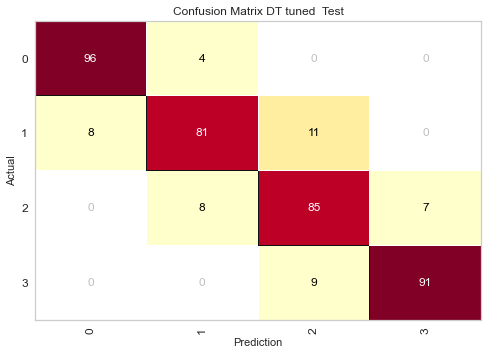

In [569]:
## confusion matrix 

cm_tuned_DT = ConfusionMatrix(DT_tuned, classes = [0,1,2,3])
cm_tuned_DT.fit(X_train, y_train)

cm_tuned_DT.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT tuned  Test')
plt.show()

# most error happened when predicting phone in price range 1 

## Random Forest Tuning

In [571]:
random_forest_tuned = RandomForestClassifier()
param_RF_tuned = {'criterion': ['gini','entropy'],
                 'max_depth':[None, 2, 6, 8, 12],
                 'min_samples_split':[2,4,6,1,5],
                 'min_samples_leaf':[1, 2, 4, 6],
                 'max_features': [None, 'auto', 'sqrt', 'log2'],
                 'max_leaf_nodes':[None, 1, 2, 4, 6]}

model_RF_tuned = GridSearchCV(random_forest_tuned, param_RF_tuned, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)
model_RF_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 6, 8, 12],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 1, 2, 4, 6],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 1, 5]},
             scoring='accuracy', verbose=1)

In [572]:
RF_tuned = model_RF_tuned.best_estimator_
y_RF_tuned = RF_tuned.predict(X_test)

In [573]:
RF_tuned_train = RF_tuned.score(X_train,y_train)

print('Training Score for RF tuned model: ', RF_tuned.score(X_train,y_train))
print('Testing Score for RF tuned model: ', RF_tuned.score(X_test, y_test))

# even with 20000 fit random forest is still overfitting this might be due to features selection

Training Score for RF tuned model:  0.995625
Testing Score for RF tuned model:  0.945


In [576]:
acc_tuned_RF = accuracy_score(y_test, y_RF_tuned)

print(classification_report(y_test, y_RF_tuned))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       100
           1       0.92      0.91      0.91       100
           2       0.92      0.90      0.91       100
           3       0.98      0.97      0.97       100

    accuracy                           0.94       400
   macro avg       0.94      0.95      0.94       400
weighted avg       0.94      0.94      0.94       400



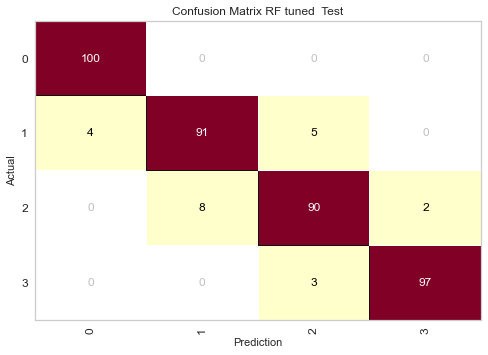

In [577]:
cm_tuned_RF = ConfusionMatrix(RF_tuned, classes = [0,1,2,3])
cm_tuned_RF.fit(X_train, y_train)

cm_tuned_RF.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF tuned  Test')
plt.show()

### XGB tuning

In [582]:
XGB_tuned =XGBClassifier()
param_XGB_tuned = {'max_depth': [3, 2, 4, 1],
                 'learning_rate': [0.1, 0.3],
                 'n_estimator': [100],
                 'gamma': [0, 0.3, 0.5],
                 'colsample_bytree': [1, 1.4, 0.5],
                 'subsample':[1],
                 'reg_alpha':[0, 0.5, 1.0],
                 'reg_lambda':[1, 1.5, 2.1]}

model_XGB_tuned = GridSearchCV(XGB_tuned, param_XGB_tuned, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)
model_XGB_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2436 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  3.2min finished


[12:48:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [583]:
XGB_tuned = model_XGB_tuned.best_estimator_
y_XGB_tuned = XGB_tuned.predict(X_test)

In [584]:
XGB_tuned_train = XGB_tuned.score(X_train,y_train)

print('Training Score for XGB tuned model: ', XGB_tuned.score(X_train,y_train))
print('Testing Score for XGB tuned model: ', XGB_tuned.score(X_test, y_test))

# we can see that this model is still overfitting even after tuning, we can conclude that we need better
# feature selection for 3 overfitting model

Training Score for XGB tuned model:  1.0
Testing Score for XGB tuned model:  0.95


In [585]:
acc_tuned_XGB = accuracy_score(y_test, y_XGB_tuned)

print(classification_report(y_test, y_XGB_tuned))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       0.94      0.95      0.95       100
           2       0.92      0.90      0.91       100
           3       0.96      0.95      0.95       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



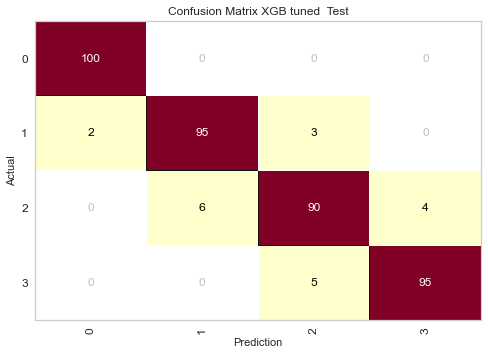

In [586]:
cm_tuned_XGB = ConfusionMatrix(XGB_tuned, classes = [0,1,2,3])
cm_tuned_XGB.fit(X_train, y_train)

cm_tuned_XGB.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGB tuned  Test')
plt.show()

In [596]:
evaluation_matrix_tuned = {'Training': [logreg_tuned_train_base, KNN_tuned_train,SVC_tuned_train,DT_tuned_train, RF_tuned_train, XGB_tuned_train],
                         'Testing':[acc_logreg_tuned_base, acc_KNN_tuned,acc_tuned_SVC,acc_tuned_DT, acc_tuned_RF, acc_tuned_XGB]}

eva_tuned = pd.DataFrame(data = evaluation_matrix_tuned, index = ['Logistic Regression Tuned', 'KNN Tuned', 'SVC Tuned', 'DT tuned', 'RF Tuned', 'XGB Tuned'])
eva_tuned

# we can see that there's definitely an overfitting problem in this hyperparameter tuning a base model

,Training,Testing
Logistic Regression Tuned,0.544375,0.5350
KNN Tuned,1.000000,0.9325
SVC Tuned,0.926875,0.9575
DT tuned,0.976875,0.8825
RF Tuned,0.995625,0.9450
XGB Tuned,1.000000,0.9500


In [598]:
evaluation_matrix_featured_tuned = {'Training': [logreg_tuned_train, KNN_tuned_train_scaled,SVC_tuned_train_scaled,logreg_tuned_train_poly],
                         'Testing':[acc_tuned_logreg, acc_KNN_tuned_scaled,acc_scaled_SVC,acc_logreg_tuned_poly]}

eva_featured_tuned = pd.DataFrame(data = evaluation_matrix_featured_tuned, index = ['Logistic Regression Scaled Tuned', 'KNN Scaled Tuned', 'SVC Scaled Tuned', 'Logreg Scaled Poly Tuned'])
eva_featured_tuned

,Training,Testing
Logistic Regression Scaled Tuned,0.929375,0.9475
KNN Scaled Tuned,1.000000,0.9150
SVC Scaled Tuned,0.925625,0.9275
Logreg Scaled Poly Tuned,0.934375,0.9475


In [601]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

### Conclusion

In [607]:
display_side_by_side([eva_base, eva_tuned], ['Base Model', 'Tuned Model'])

,Training,Testing
Logistic Regression,0.544375,0.535000
KNN,0.938125,0.925000
SVC,0.927500,0.940000
Decision Tree,1.000000,0.867500
Random Forest,1.000000,0.945000
Xtreme Gradient Boost,1.000000,0.952500
,Training,Testing
Logistic Regression Tuned,0.544375,0.535000
KNN Tuned,1.000000,0.932500
SVC Tuned,0.926875,0.957500


In [608]:
display_side_by_side([eva_featured, eva_featured_tuned], ['Base Model', 'Tuned Model'])

,Training,Testing
Logistic Regression Scaled,0.909375,0.935000
KNN Scaled,0.891875,0.847500
SVC Scaled,0.931250,0.927500
Linreg Scaled Poly,0.927500,0.950000
,Training,Testing
Logistic Regression Scaled Tuned,0.929375,0.947500
KNN Scaled Tuned,1.000000,0.915000
SVC Scaled Tuned,0.925625,0.927500
Logreg Scaled Poly Tuned,0.934375,0.947500


**Conclusion**

- We can see that from all the evaluation matrix for this phone classfication, we see that, **SVC after  hyperparameter tuning without scalling has the best accuracy** when it comes to predicting phone price range based on certain features.


- We also see that there're some overfitting model, we can see it by looking the the significance difference training score and testing score 

**Recommendation & Improvement**

1. Different features selection for certain models that is overfitting, by looking at the 4 tables above we can clearly see that there's overfitting problem in some of our models, for future references please use a simpler feature selection for overfitted model


2. Reliability of the data, this dataset has a lot of randomness to it, like having **pixel height that's lower than 240px, 0 width for screen and etc**, doing a lot of cleanining replacing random values of the data might have an effect in our model


3. Using Different kind of scaler, in this modeling i use a minmax scaller to scale the X train and X test, fot future references using different kind of scaller might have an effect to the model